# **write a VAE:**

2.  where the encoder (left) is replaced with an encoder-decoder architecture (both downsampling-upsampling)

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

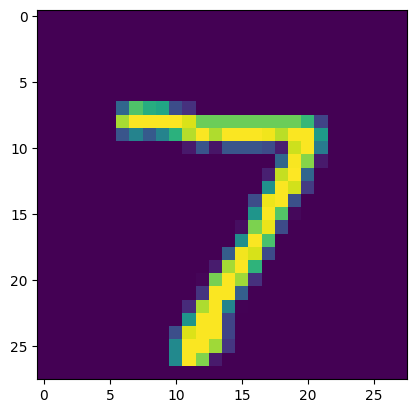

In [3]:
plt.imshow(X_test[0])

In [4]:
#converting into vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [5]:
#rescale
X_train = X_train/255
X_test = X_test/255
X_train.max()

1.0

model

In [6]:
# Input Layer
input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

# Encoder (First Part)
encoder1 = Dense(64, activation="relu", name="encoder1")(input_layer)
bottleneck1 = Dense(32, activation="relu", name="bottleneck1")(encoder1)

# Decoder (First Part)
decoder1 = Dense(64, activation="relu", name="decoder1")(bottleneck1)
#output1 = Dense(X_train.shape[1], activation="sigmoid", name="output1")(decoder1)

# Second Bottleneck
bottleneck2 = Dense(16, activation="relu", name="bottleneck2")(decoder1)

# Final Decoder
decoder2 = Dense(784, activation="relu", name="decoder2")(bottleneck2)
final_output = Dense(X_train.shape[1], activation="sigmoid", name="final_output")(decoder2)

In [7]:
autoencoder = Model(input_layer, final_output)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder1 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck1 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck2 (Dense)                  │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2 (Dense)                     │ (None, 784)                 │          13,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_output (Dense)                 │ (None, 784)                 │         615,440 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,240 (2.61 MB)

 Trainable params: 684,240 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder_layer= Input(shape =(16,), name='encoded_layer')
decoder_layer = autoencoder.layers[-2]
decoder = Model(encoder_layer, decoder_layer(encoder_layer))
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoded_layer (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2 (Dense)                     │ (None, 784)                 │          13,328 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,328 (52.06 KB)

 Trainable params: 13,328 (52.06 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
encoder= Model(input_layer, bottleneck2)
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder1 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck1 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck2 (Dense)                  │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,472 (216.69 KB)

 Trainable params: 55,472 (216.69 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.compile(loss='mse', optimizer='adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0754
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0258
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0209
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0179
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0159
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0148
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.0139
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0134
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0129
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0125
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0122
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0119
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0117
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0114
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━

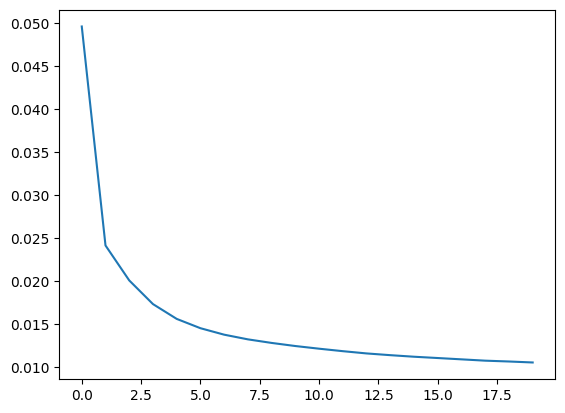

In [12]:
plt.plot(history.history['loss'])

In [13]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(10000, 16)

In [14]:
output_data=decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(10000, 784)

In [15]:
reshaped_output_data = output_data.reshape(output_data.shape[0], 28, 28)
reshaped_output_data.shape

(10000, 28, 28)

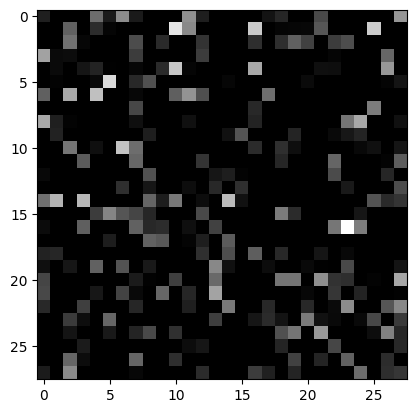

In [16]:
plt.imshow(reshaped_output_data[0], cmap='gray')

In [17]:
X_test=X_test.reshape(10000, 28, 28)
X_test.shape

(10000, 28, 28)

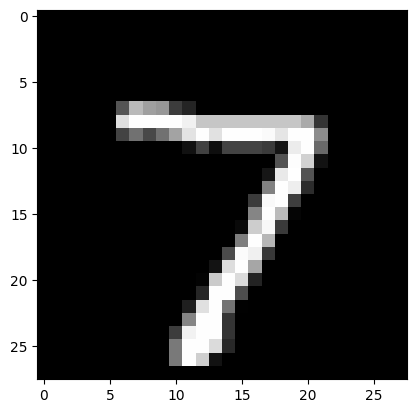

In [18]:
plt.imshow(X_test[0], cmap='gray')

In [19]:
from sklearn.metrics import mean_squared_error

# Reshape X_test to match output_data's shape
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Calculate MSE
mse = mean_squared_error(X_test_flat, output_data)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8806044319044611


# Conclusion
For an architecture the encoder is replaced with an encoder-decoder architecture, the mean-square error is 0.881.